#### MNIST 분류 모델 구현
- 목적 : 손글씨 숫자 0 ~ 9 이미지를 분류
- 데이터 : Keras의 내장 데이터셋 사용

In [125]:
import numpy as np

In [126]:
np.set_printoptions(suppress=True, floatmode='fixed')

##### [1] 데이터 준비 및 확인

In [97]:
import tensorflow as tf

In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets.mnist import load_data

import matplotlib.pyplot as plt

[1-1] 데이터 로딩

In [99]:
(X_tr, y_tr), (X_te, y_te) = load_data()

[1-2] 데이터 확인

X_tr.shape, y_tr.shape

In [100]:
X_te.shape, y_te.shape

((10000, 28, 28), (10000,))

##### [2] 이미지 분류 모델 구현

[2-1] 모델 설계 => 층 설정
- 입력층 => 입력 28 * 28 = 784, 출력, 활성화함수 relu
- 은닉층 => 입력, 출력, 활성화함수 relu
- 출력층 => 입력, 출력 10, 활성화함수 softmax

In [101]:
mnistModel = Sequential(name='mnist_Model')

In [119]:
from tensorflow.keras.layers import Flatten

[2-2] 모델 생성 => 최적화, 손실, 평가지표

In [120]:
# 입력층 --> 입력되는 데이터 즉 피쳐 수 설정 input_shape=(feature shape)
mnistModel.add(Flatten(input_shape=(28, 28)))

In [121]:
# 은닉층
mnistModel.add(Dense(50, activation='relu'))

In [122]:
# 은닉층
mnistModel.add(Dense(30, activation='relu'))

In [123]:
# 출력층
mnistModel.add(Dense(10, activation='softmax'))

In [124]:
mnistModel.summary()

Model: "mnist_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_11 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_12 (Dense)             (None, 10)                310       
_________________________________________________________________
flatten (Flatten)            (None, 10)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 50)                550       
_________________________________________________________________
dense_14 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                

In [107]:
mnistModel.compile(optimizer = 'adam',
                   loss='sparse_categorical_crossentropy',
                   metrics = ['acc'])

- 사용자 지정 최적화, 손실, 평가지표 설정

In [106]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.optimizers import Adam

In [90]:
# adam_op = Adam(learning_rate=0.1)
# acc_ = Accuracy(dtype=tf.int32)
# loss_ = SparseCategoricalCrossentropy(from_logits=True)

In [91]:
# mnistModel.compile(optimizer=adam_op,
#                    loss = loss_,
#                    metrics=[acc_])

##### [3] 학습
- 입력층 => input_shape = ( 피쳐수, ) 또는 input_shape = [피쳐수]

[3-1] 데이터의 형(shape)체크 => rank-1

In [108]:
X_tr.shape

(60000, 28, 28)

In [109]:
X_tr = X_tr.reshape(60000, -1)

In [110]:
X_tr.shape

(60000, 784)

[3-2] 학습 실행 ==> 학습횟수 epochs

In [111]:
mnistModel.fit(X_tr, y_tr, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 1.6965 - acc: 0.7976 - val_loss: 0.4281 - val_acc: 0.8872
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3708 - acc: 0.9037 - val_loss: 0.3075 - val_acc: 0.9230
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2834 - acc: 0.9247 - val_loss: 0.2630 - val_acc: 0.9314
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2464 - acc: 0.9328 - val_loss: 0.2437 - val_acc: 0.9377
Epoch 5/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2211 - acc: 0.9403 - val_loss: 0.2414 - val_acc: 0.9397
Epoch 6/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1978 - acc: 0.9446 - val_loss: 0.2334 - val_acc: 0.9392
Epoch 7/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1871 - acc: 0.9474 - val_loss: 0.2635 - val_acc: 0.9326
Epoch 8/10
1500/1500 [==============================] - 2s 2ms

##### [4] 평가
- 테스트 데이터 사용 => 입력 데이터의 형(shape) 설정

In [112]:
X_te.shape

(10000, 28, 28)

In [113]:
X_te = X_te.reshape(10000, -1)
X_te.shape

(10000, 784)

In [114]:
mnistModel.evaluate(X_te, y_te)

# loss, accuracy 출력

313/313 [==============================] - 1s 1ms/step - loss: 0.2180 - acc: 0.9460


[0.21803422272205353, 0.9459999799728394]

##### [5] 예측

In [115]:
test_data = np.reshape(X_te[0], (28, 28))

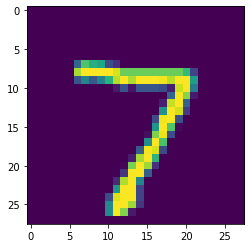

In [116]:
plt.imshow(np.reshape(X_te[0], (28, 28)))
plt.show()

In [117]:
# 1차원으로 변경
y_pre = mnistModel.predict(test_data.reshape(1, -1))
y_pre

array([[0.00000050, 0.00000001, 0.00000349, 0.00034947, 0.00000000,
        0.00062151, 0.00000000, 0.99902236, 0.00000002, 0.00000276]],
      dtype=float32)

In [118]:
np.argmax(y_pre)

7

#### Tensorboard 관련
- 설치 : !pip install tensorboard
- 생성
    * from tensorflow.keras.callbacks import TensorBoard
    * tensorBoard_callback = TensorBoard(log_dir='./logs', histogram_freq=True, profile_batch=5)

- 설정
    * fit()함수의 callback 매개변수에 설정